**Importando bibliotecas**

In [173]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**Lendo datasets**

In [174]:
clientes=pd.read_csv('olist_customers_dataset.csv')
vendedores=pd.read_csv('olist_sellers_dataset.csv')


# **PARTE 1**

# **Estudo de clientes por estado**






**Tabela de clientes**

In [175]:
clientes

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


**Verificando se existem valores nulos nos estados**

In [176]:
clientes[clientes['customer_state'].isnull()].shape[0]

0

**Plotando os gráficos de clientes por Estado**

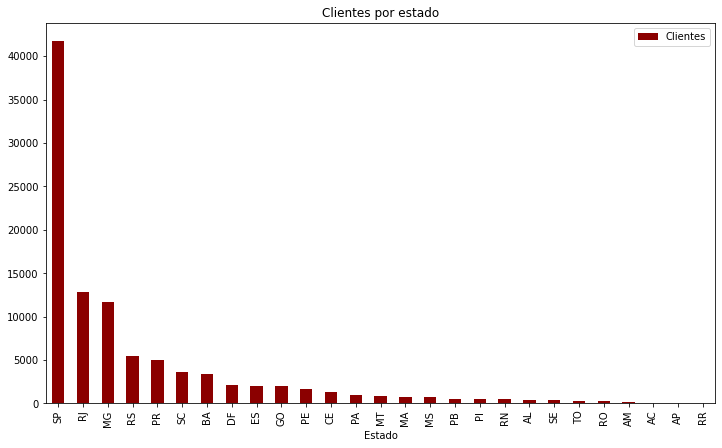

In [177]:
clientes.rename(columns={'customer_unique_id':'Clientes','customer_state':'Estado','customer_city':'Cidade'},inplace=True)
cliente_estado=clientes.groupby(['Estado'])['Clientes'].count().sort_values(ascending=False)
cliente_estado=cliente_estado.to_frame()
CEP=cliente_estado.plot(kind='bar',figsize=(12,7),color='Darkred',title='Clientes por estado')
CEP

### A partir do gráfico podemos ver que a diferença entre o estado de São Paulo e os demais é discrepante.

In [178]:
outros = cliente_estado.drop('SP')
outros['Clientes'].sum()


57695

In [179]:
cliente_estado.loc['SP']

Clientes    41746
Name: SP, dtype: int64

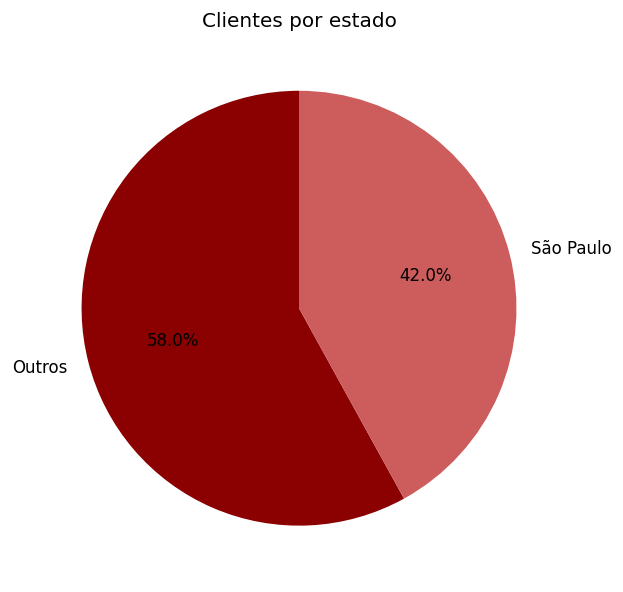

In [180]:
y = np.array([57695, 41746])
nomes = ["Outros", "São Paulo"]
cores = ["darkred", "indianred"]
fig = plt.figure(figsize=(6,6),dpi=120)
plt.pie(y, labels = nomes,startangle=90,colors=cores,autopct='%1.1f%%',)
plt.title('Clientes por estado')
plt.show() 

### A partir desse gráfico podemos ver que o estado de São Paulo compõe 42% do total de clientes.

# **Estudo de vendedores por estado**

Tabela de vendedores


In [181]:
vendedores

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


 **Verificando se existem valores nulos nos estados**



In [182]:
vendedores[vendedores['seller_state'].isnull()].shape[0]

0

**Plotando os gráficos de vendedores por Estado**

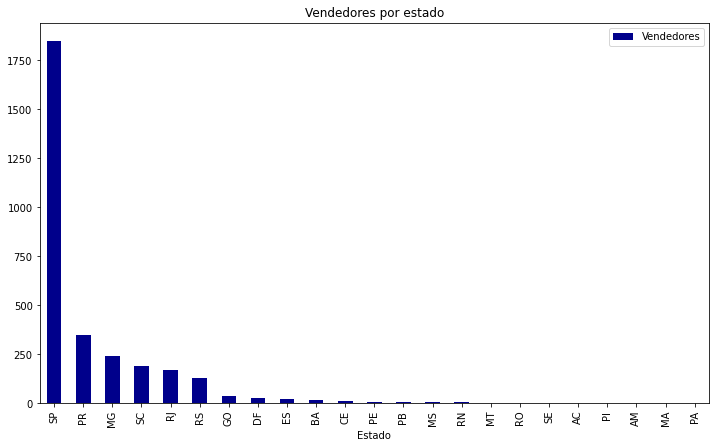

In [183]:
vendedores.rename(columns={'seller_id':'Vendedores','seller_state':'Estado'},inplace=True)
vendedor_estado=vendedores.groupby(['Estado'])['Vendedores'].count().sort_values(ascending=False)
vendedor_estado=vendedor_estado.to_frame()
vendedor_estado.plot(kind='bar',figsize=(12,7),color='darkblue',title='Vendedores por estado')

### Novamente São Paulo está em primeiro lugar.




In [184]:
outrosv = vendedor_estado.drop('SP')
outrosv['Vendedores'].sum()


1246

In [185]:
vendedor_estado.loc['SP']

Vendedores    1849
Name: SP, dtype: int64

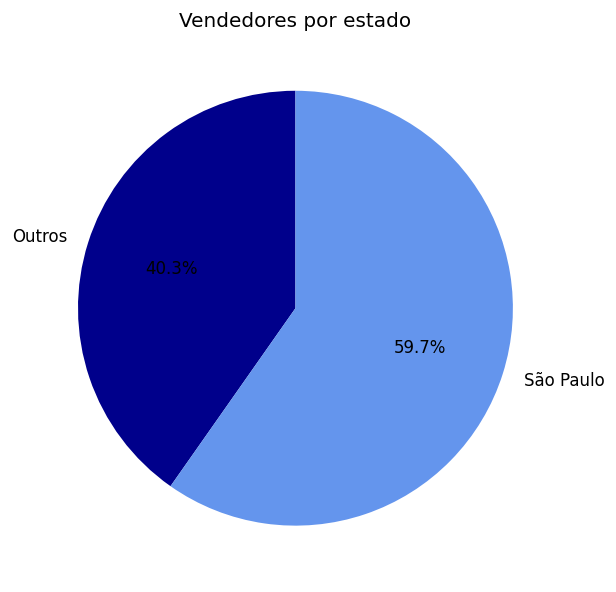

In [186]:
z = np.array([1246, 1849])
nomes = ["Outros", "São Paulo"]
cores = ["darkblue", "cornflowerblue"]
fig = plt.figure(figsize=(6,6),dpi=120)
plt.pie(z, labels = nomes,startangle=90,colors=cores,autopct='%1.1f%%',)
plt.title('Vendedores por estado')
plt.show() 

### Diferente dos clientes, os vendedores de São Paulo compõe mais da metade (59,7%) do total.

# **Resumo - parte 1**

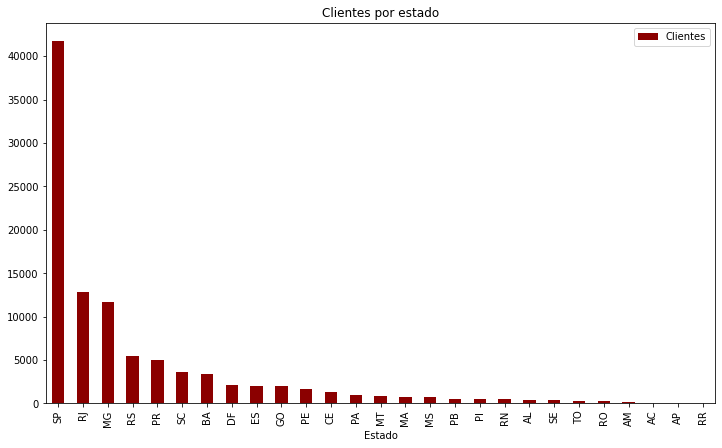

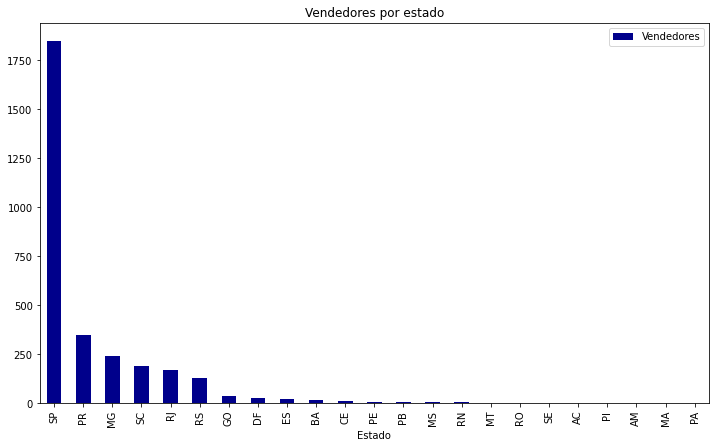

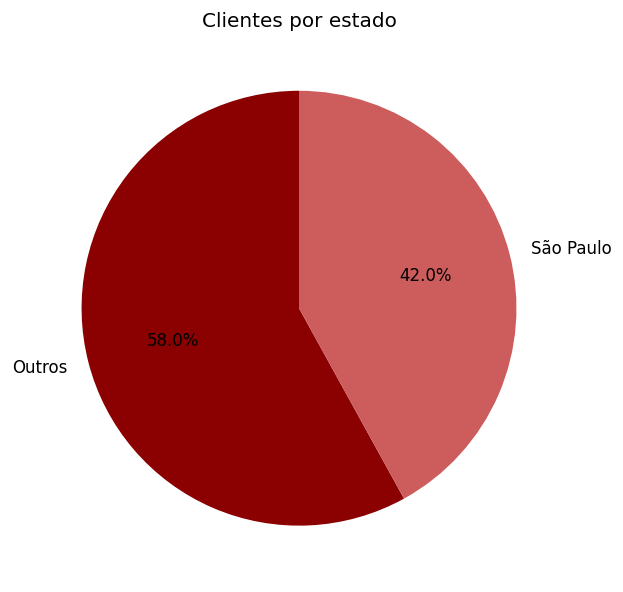

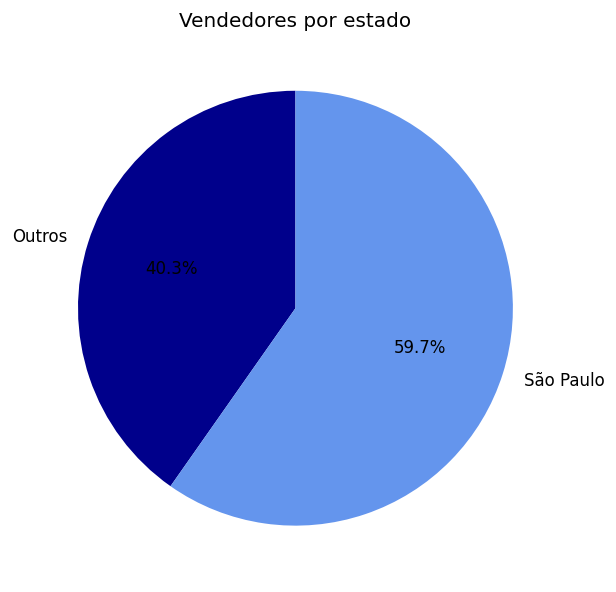

# **PARTE 2**

# **Estudo de clientes na cidade de São Paulo**





In [187]:
sel=clientes['Estado']=='SP'
cliente_sp=clientes[sel]
cliente_sp

,customer_id,Clientes,customer_zip_code_prefix,Cidade,Estado
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99432,f255d679c7c86c24ef4861320d5b7675,d111b06b6f3a2add0d2241325f65b5ca,13500,rio claro,SP
99434,f5a0b560f9e9427792a88bec97710212,b3e53d18a997f27a3ffd16da497eaf58,7790,cajamar,SP
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP


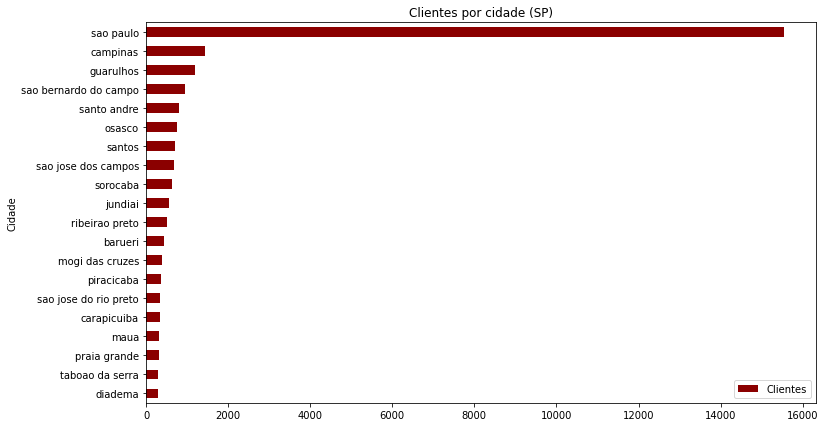

In [188]:
sel=clientes['Estado']=='SP'
cliente_sp=clientes[sel]
cidade_estado=cliente_sp.groupby(['Cidade'])['Clientes'].count().sort_values(ascending=False)
cidade_estado=cidade_estado.to_frame()
cidade_estado20=cidade_estado.head(20)
ax = cidade_estado20.plot(kind='barh',figsize=(12,7),color='Darkred',title='Clientes por cidade (SP)') 
ax.invert_yaxis()


### Podemos ver no gráfico que a capital do estado fica em primeiro lugar.

In [189]:
outros_sp=cidade_estado.drop('sao paulo')
outros_sp['Clientes'].sum()

26206

In [190]:
cidade_estado.loc['sao paulo']

Clientes    15540
Name: sao paulo, dtype: int64

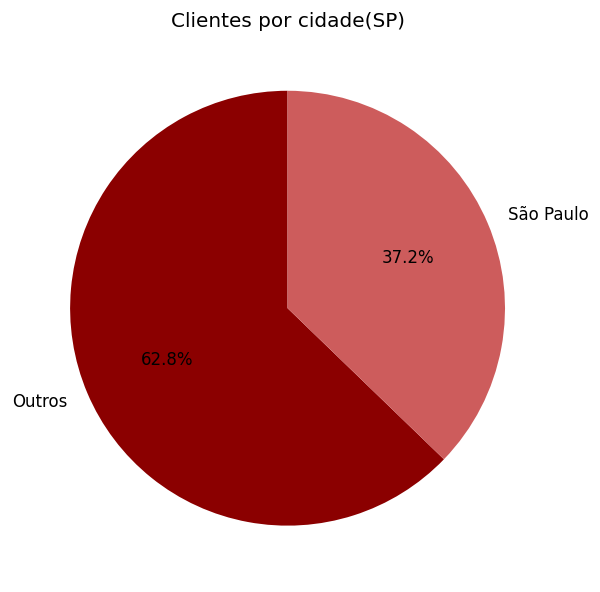

In [191]:
w = np.array([26206, 15540])
nomes = ["Outros", "São Paulo"]
cores = ["darkred", "indianred"]
fig = plt.figure(figsize=(6,6),dpi=120)
plt.pie(w, labels = nomes,startangle=90,colors=cores,autopct='%1.1f%%')
plt.title('Clientes por cidade(SP)')
plt.show() 

### Dentro do estado de SP, a capital compõe 37,2% dos clientes.

# **Estudo de vendedores na cidade de São Paulo**


In [192]:
vendedores

,Vendedores,seller_zip_code_prefix,seller_city,Estado
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


### Mudando o nome da coluna da cidade dos vendedores

In [193]:
vendedores.rename(columns={'seller_city':'Cidade'},inplace=True)

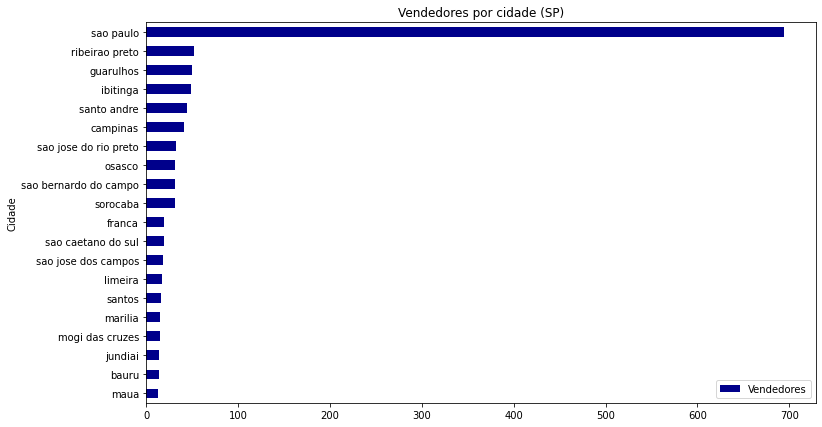

In [194]:
sel=vendedores['Estado']=='SP'
vendedor_sp=vendedores[sel]
vendedor_estado=vendedor_sp.groupby(['Cidade'])['Vendedores'].count().sort_values(ascending=False)
vendedor_estado=vendedor_estado.to_frame()
vendedor_estado20=vendedor_estado.head(20)
ax = vendedor_estado20.plot(kind='barh',figsize=(12,7),color='darkblue',title='Vendedores por cidade (SP)') 
ax.invert_yaxis()


### A cidade de São Paulo, assim como nos clientes, continua em primeiro lugar de vendedores.





In [195]:
outrosven_sp=vendedor_estado.drop('sao paulo')
outrosven_sp['Vendedores'].sum()

1155

In [196]:
vendedor_estado.loc['sao paulo']

Vendedores    694
Name: sao paulo, dtype: int64

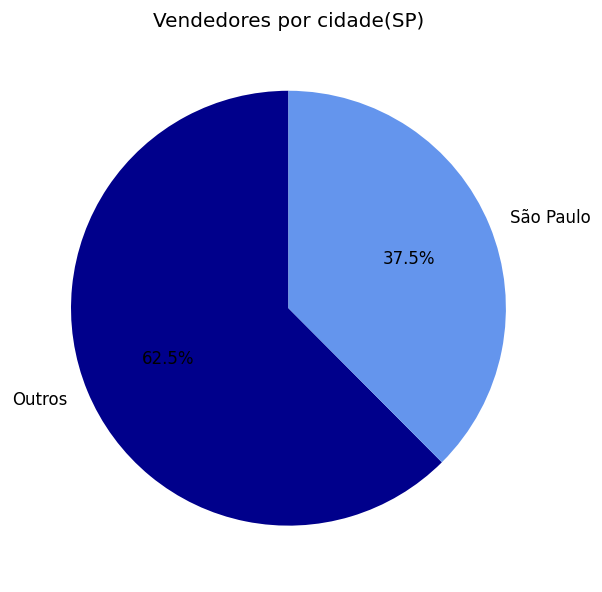

In [197]:
xy = np.array([1155, 694])
nomes = ["Outros", "São Paulo"]
cores = ["darkblue", "cornflowerblue"]
fig = plt.figure(figsize=(6,6),dpi=120)
plt.pie(xy, labels = nomes,startangle=90,colors=cores,autopct='%1.1f%%',)
plt.title('Vendedores por cidade(SP)')
plt.show() 

### Sobre os vendedores no estado, a capital tem a participação de 37,5%. Porcentagem muito próxima a de clientes da capital(37,2).

# **Resumo - parte 2**

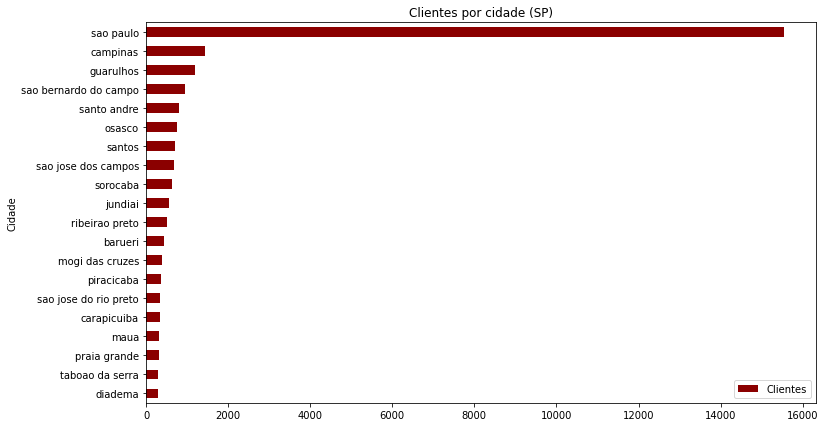

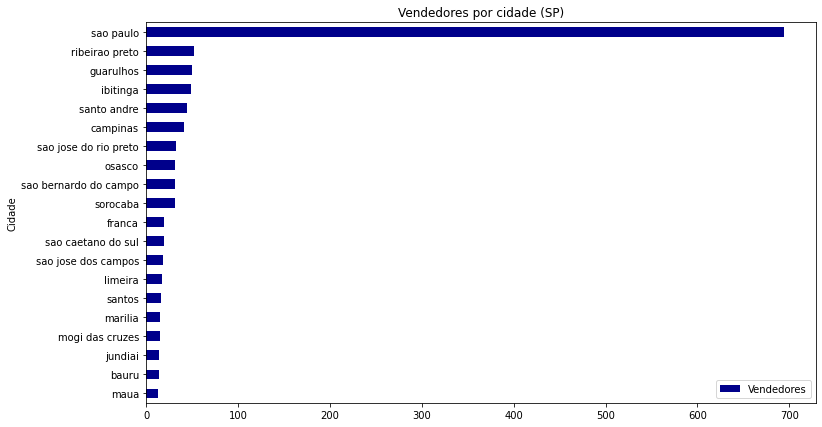

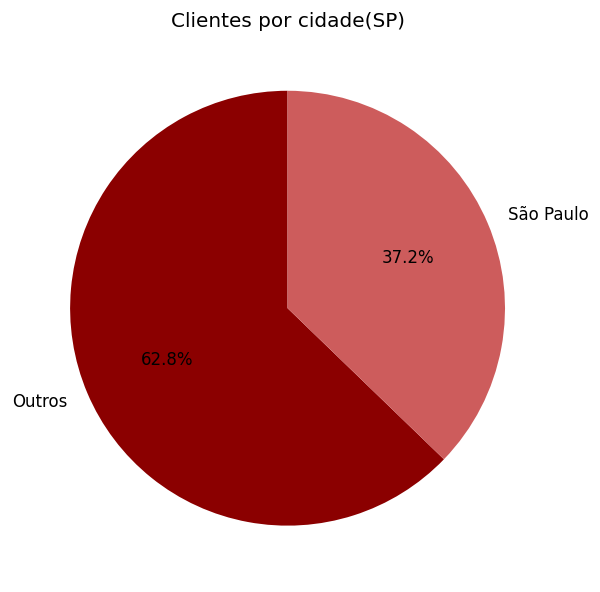

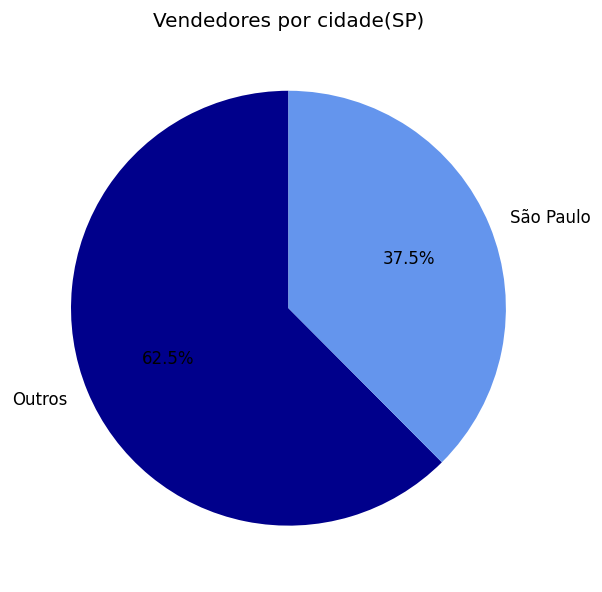